<a href="https://colab.research.google.com/github/ika-si/AI-Fri45/blob/main/math_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# pythonで主成分分析を実装する

## 1.主成分分析立式編

### 1-0. Google Colab のファイルを手元にコピーする
- この文を読めている時点でアクセスには成功している。
- 自身のGoogleドライブ上の好きな場所にこのファイルのコピーを作成しよう。
- 自身のローカルで実行していっても良いが、基本的にはGoogle Colabで進めることを想定している。
- **グループで準備編の空欄「　①　」から「　⑨　」までを埋めて、代表者がTAに報告しよう（誰か1名でよい）。TAは「全部あっている」「1-ほにゃららに間違いがある」のいずれかを判定する。**
  - **全部あっている場合は次のURLを知らされる。**
  - **間違いがある場合は一度戻って考えること。「1-ほにゃらら」は教えるが、そのどれが間違っているかは秘匿されるので、落ち着いて見直すこと。**

### 1-1. 主成分分析でやりたいこと

ここからは理解を簡単にするために、この図の様な2次元空間を考えよう。改めて特徴量ベクトルを$\boldsymbol{x} \in \mathbb{R}^2$として、1次元の空間に射影するための射影ベクトル$\boldsymbol{w} \in \mathbb{R}^2$を求めたい。

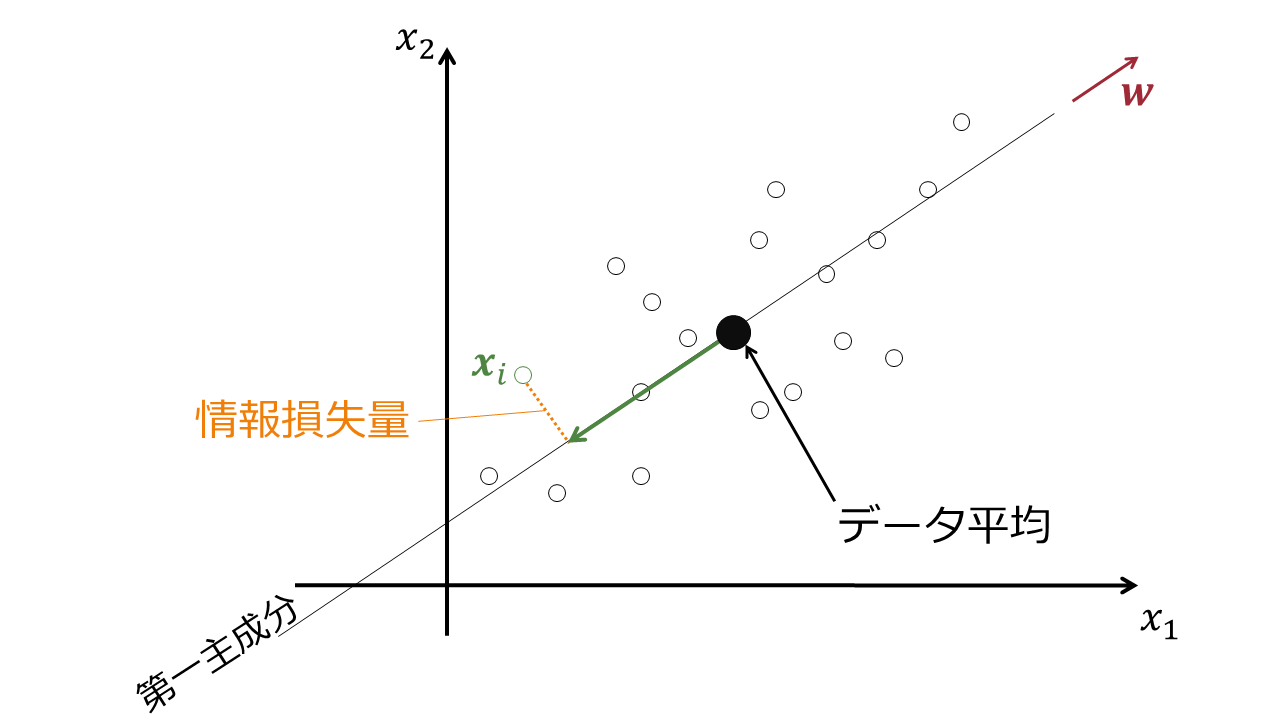

特徴量$\boldsymbol{x}$は$\boldsymbol{x}_1$から$\boldsymbol{x}_n$までの$n$個あるとしよう。そして簡単のために、平均ベクトル$\frac{1}{n}\sum_{i=1}^{n} \boldsymbol{x}_i = \boldsymbol{0}$としよう。そしてもうひとつ、$\boldsymbol{w}$は単位ベクトル、つまりノルム（長さ）が1だとしよう。数式としては
$$\boldsymbol{w}^\top \boldsymbol{w} = 「　①　1 」$$
ということになる。

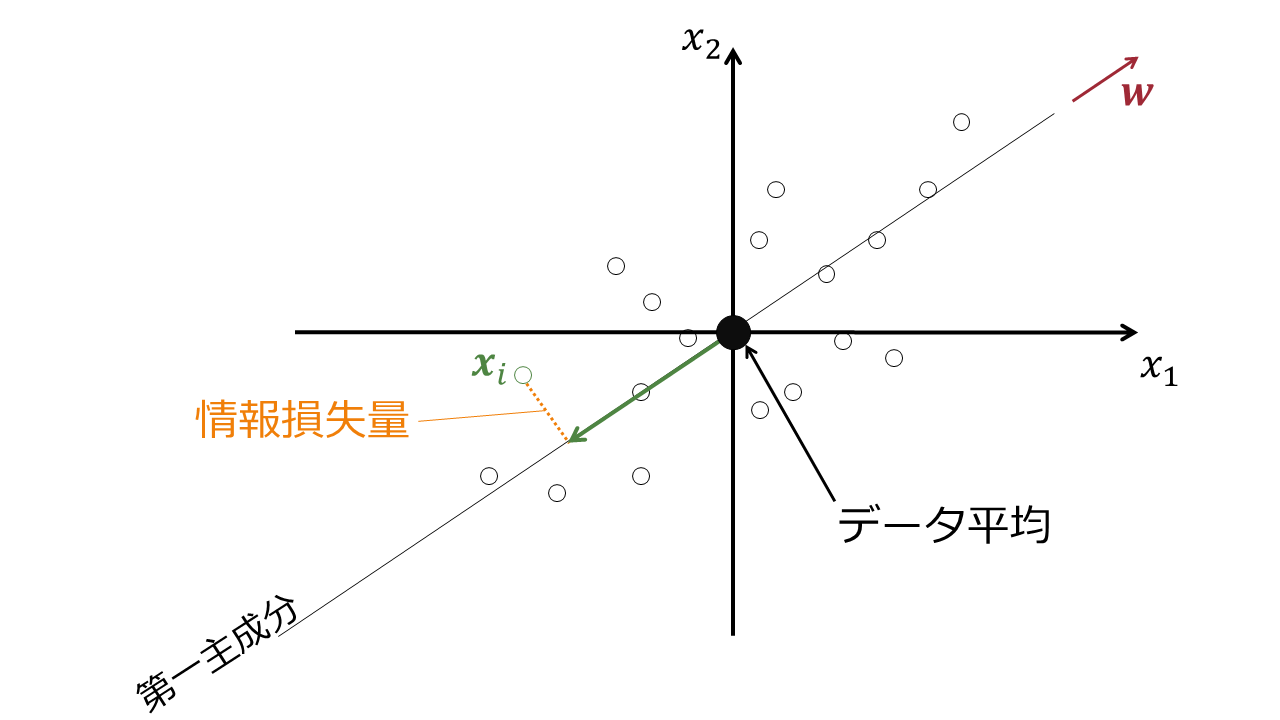

さて、図にあるような1次元の空間に射影する時の座標を考える。図中にあるような向き$\boldsymbol{w}$に単位ベクトルをとる1次元空間上に$\boldsymbol{x}_i$を射影したときの座標は
$$「　②　\boldsymbol{w}^\top \boldsymbol{x}_i」$$
となる。これは、**この1次元空間上での座標値であることに注意してほしい。**もとの2次元空間上では元の単位ベクトルと、1次元空間上での座標をかけたベクトル、つまり
$$(\boldsymbol{w}^\top \boldsymbol{x}_i)\boldsymbol{w}$$
となる。

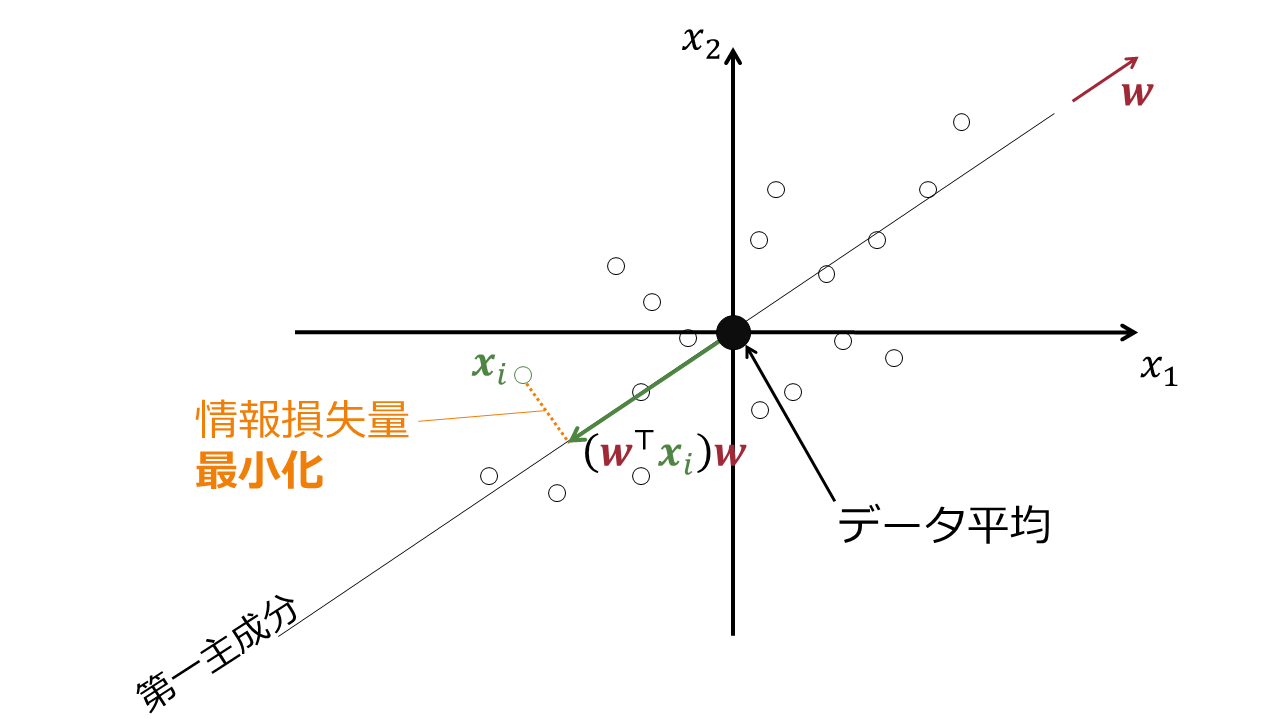


これは言い方を変えると、$\boldsymbol{x}_i$だった特徴量（緑の○の位置）が$(\boldsymbol{w}^\top \boldsymbol{x}_i)\boldsymbol{w}$（緑の矢印の先）に移動しているということでもある。つまり、$\boldsymbol{x}_i-(\boldsymbol{w}^\top \boldsymbol{x}_i)\boldsymbol{w}$の長さ（オレンジの部分）だけが失われることになる。**主成分分析は、この情報損失量を最小化する$\boldsymbol{w}$を求める手法である。**

　

---

　
### 1-2. 主成分分析を解く

では実際に、主成分分析によって$\boldsymbol{w}$がどのように求められるのかを見ていこう。**まず、「全$n$点のデータで情報損失量を最小化すること」は、「全$n$点のデータで先ほど求めた座標$\boldsymbol{w}^\top \boldsymbol{x}_i$の分散を最大化すること」と等価であることに気づく。**

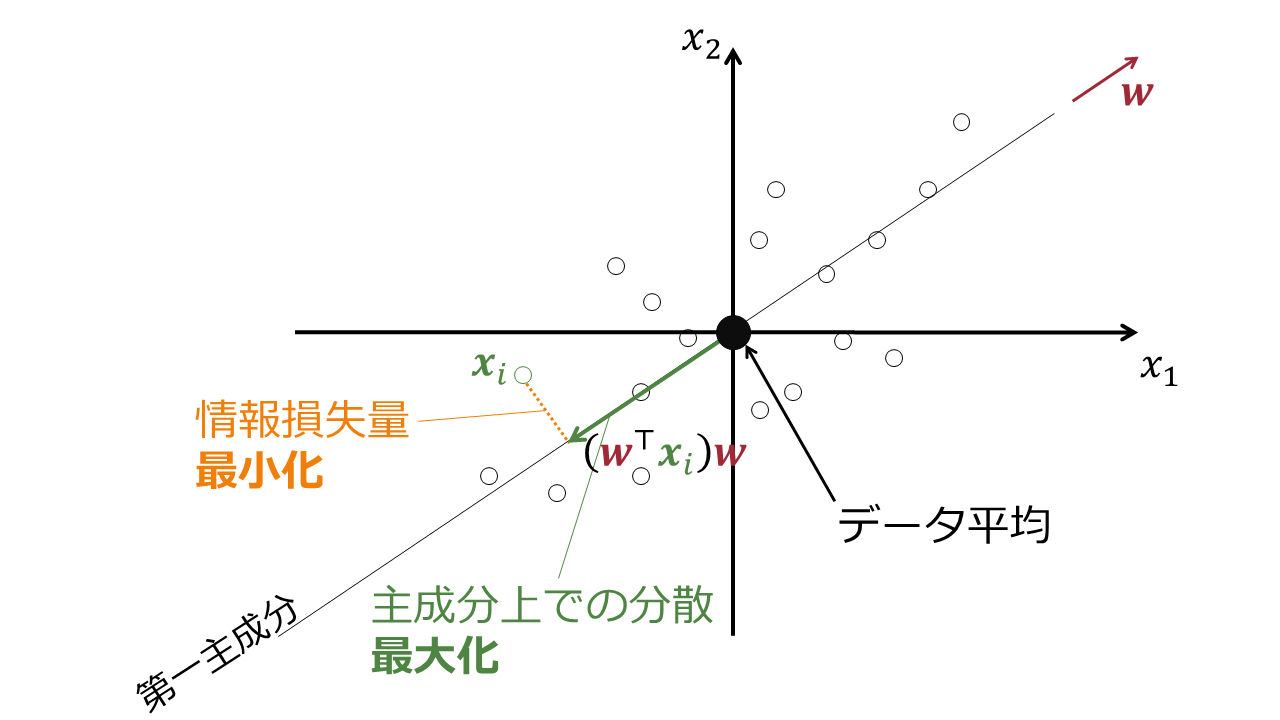

機械学習でよく現れる数式表現を紹介しよう。「$\boldsymbol{w}$は全$n$点での$\boldsymbol{w}^\top \boldsymbol{x}_i$の分散を最大化する$\boldsymbol{w}$である」とは、数式的には
$$\boldsymbol{w} = \arg \max_{\boldsymbol{w}} \frac{1}{n}\sum^{n}_{i=1} (\boldsymbol{w}^\top \boldsymbol{x}_i)^2$$
と書く。$\max$は、「右側の項を最大化するよ」という宣言であり、その添え字がある場合は、「その変数を使って右側の項を最大化するよ」という意味になる。つまり、$\max_{\boldsymbol{w}} \frac{1}{n}\sum^{n}_{i=1} (\boldsymbol{w}^\top \boldsymbol{x}_i)^2$と言う部分では、「分散が最大になるように$\boldsymbol{w}$を調整するよ」という意味になる。そして$\arg$が付くと、その調整した結果の変数を指す。

「あれ？$\boldsymbol{w}^\top \boldsymbol{x}_i$の分散って、単純に$\boldsymbol{w}^\top \boldsymbol{x}_i$を2乗するんじゃなくて、その平均を引いてから2乗しないといけないんじゃない？」と思った人は、ちゃんと分散の定義を覚えていてえらい。その通り、普通の変数$x$の分散は平均値$\bar{x}$を用いて$\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2$を計算する必要がある。**しかしながら、ここでは「　③平均が０　」なので問題ない。（注意：「　③　」は自由記述形式）**

さて、ここで$\boldsymbol{w}$は**「　④　単位ベクトル」**だという条件を付けていたことを思い出してほしい。**（注意：「　④　」は自由記述形式）**実際この条件が無いと、$\boldsymbol{w}$のノルムを単純に大きくするだけで$(\boldsymbol{w}^\top \boldsymbol{x}_i)^2$という値はいくらでも大きくなってしまう。こういう条件を示す場合には、such thatの略であるs.t.を用いて
$$\boldsymbol{w} = \arg \max_{\boldsymbol{w}} \frac{1}{n}\sum^{n}_{i=1} (\boldsymbol{w}^\top \boldsymbol{x}_i)^2 \ \textrm{s.t.} \ \boldsymbol{w}^\top\boldsymbol{w}=1$$
と書く。これが主成分分析で具体的に行う最適化の式である。

　

---

　
#### 1-3. 中高時代の数学を思い出す

最適化と言うと小難しいことをしようとしている印象があるかもしれないが、実は皆中高時代の数学で似たようなことをやっている。たとえば「$x$の関数$f(x)=x^2+3x+4$の最小値を求めよ」みたいな問題を見たことは無いだろうか。あるいは「$x$の関数$f(x)=x^3+x^2-x-1$が$-2 \leq x \leq 2$のときの最小値を求めよ」みたいな問題を見たことは無いだろうか。この時やるのは、**「関数$f(x)$を$x$で微分して、それが0になる時の関数の値（極値）を調べる」**という作業である。

今回の主成分分析も、関数がスカラーの関数からベクトルの関数になっただけだ。
$$f(\boldsymbol{w})=\frac{1}{n}\sum^{n}_{i=1} (\boldsymbol{w}^\top \boldsymbol{x}_i)^2$$
という関数を$\boldsymbol{w}$で「ビブン」して、それが「ゼロ」になる時の値を調べればよい。

…とはいったものの、ここで忘れてはいけないのが条件式だ。$\boldsymbol{w}^\top\boldsymbol{w}=1$という条件を満たしながら$f(\boldsymbol{w})$を最大化せよ、というと中高の数学の範囲ではなかなか解きにくい問題になる。

　

---

　
#### 1-4. ラグランジュ未定乗数法

ここで便利な手法としてラグランジュ未定乗数法というものを用いる。$\boldsymbol{w}$はノルムが1であるという条件を
$$g(\boldsymbol{w}) = \boldsymbol{w}^\top\boldsymbol{w}-1 = 0$$
と書き直す。この時、**$f(\boldsymbol{w})$を条件$g(\boldsymbol{w})=0$を満たしながら最適化する$\boldsymbol{w}$は、次のような関数$\mathcal{L}(\boldsymbol{w})$を「ビブン」して「ゼロ」になる時を調べればよいことが分かっている。**
$$\mathcal{L}(\boldsymbol{w})=f(\boldsymbol{w})-\lambda g(\boldsymbol{w})$$
この$\lambda$が未定乗数と呼ばれるものだが、要するに「まだ値が定まっていない（未定）の数を掛ける」ので未定乗数と言っているだけである。これがラグランジュ未定乗数法の一番簡単な形のひとつである。不等式を伴う条件や、複数の条件を取り扱う場合などの形もあるので、気になる人はぜひ調べてみてほしい。

　

---

#### 1-5. ラグランジュ未定乗数法で主成分分析を定式化してみよう

1-3と1-4で学んだことを組み合わせて、主成分分析の定式化を行おう。

$$ \boldsymbol{w}^\top \boldsymbol{x}_i = \boldsymbol{x}_i^\top \boldsymbol{w} $$

$$ (\boldsymbol{w}^\top \boldsymbol{x}_i)^2 = \boldsymbol{w}^\top \boldsymbol{x}_i \cdot \boldsymbol{w}^\top \boldsymbol{x}_i = \boldsymbol{w}^\top \boldsymbol{x}_i \cdot \boldsymbol{x}_i^\top \boldsymbol{w} $$

であることに注意して、上で議論してきた内容を組み合わせると、主成分分析の定式化は以下の通りになる。

$$\frac{\partial}{\partial \boldsymbol{w}}\mathcal{L}(\boldsymbol{w}) = \frac{\partial}{\partial \boldsymbol{w}}\left(\frac{1}{n}\sum^{n}_{i=1} (\boldsymbol{w}^\top \boldsymbol{x}_i)^2 - \lambda \left( (\boldsymbol{w}^\top \boldsymbol{w}) - 1 \right) \right) \\
= \frac{\partial}{\partial \boldsymbol{w}}\left(\frac{1}{n}\sum^{n}_{i=1} (\boldsymbol{w}^\top 「　⑤\boldsymbol{x}_i　」「　⑤\boldsymbol{x}_i　」^\top \boldsymbol{w}) - \lambda \left( (\boldsymbol{w}^\top \boldsymbol{w}) - 1 \right) \right) \\ = \frac{\partial}{\partial \boldsymbol{w}} \boldsymbol{w}^\top \left(\frac{1}{n}\sum^{n}_{i=1}  「　⑤\boldsymbol{x}_i　」「　⑤\boldsymbol{x}_i　」^\top \right) \boldsymbol{w} - \frac{\partial}{\partial \boldsymbol{w}} \boldsymbol{w}^\top \left( \lambda I  \right) \boldsymbol{w} = \boldsymbol{0} $$

　

---

#### 1-6. 「ビブン」して「ゼロ」にしてみよう

さて、今まで「ビブン」と言っているのは、今必要な作業が厳密には微分ではないからだ。ここで行うのは偏微分になる。

ということで、偏微分してみよう。最初の項も次の項も、ある行列$M$を挟んでベクトル$\boldsymbol{w}$を左右からかけた$\boldsymbol{w}^\top M \boldsymbol{w}$を$\boldsymbol{w}$で偏微分する形になっている。一般に$\boldsymbol{w}^\top M \boldsymbol{w}$は**2次形式**と呼ばれる形であるが、これをベクトル$\boldsymbol{w}$で偏微分すると$M \boldsymbol{w}$になる。従って、
$$ 「　⑥ \left(\frac{1}{n}\sum^{n}_{i=1} \boldsymbol{x}_i \boldsymbol{x}_i^\top \right) 　」 \boldsymbol{w} - 「　⑦　 \left( \lambda I  \right) 」 \boldsymbol{w} = \boldsymbol{0} $$
を得る。ここで「　⑥　」は$\boldsymbol{x}$の**分散共分散行列**と言われる行列である。
$$S_x = 「　⑥  \left(\frac{1}{n}\sum^{n}_{i=1} \boldsymbol{x}_i \boldsymbol{x}_i^\top \right)  」$$
分散共分散行列とは、あるベクトル変数の分散が対角成分に、共分散が非対角成分に格納されている行列である。

　

---

#### 1-7. 主成分分析が解けた！

従って、分散を最大化する$\boldsymbol{w}$は
$$ 「　⑧　Sx」 \boldsymbol{w} = 「　⑨ \left( \lambda I  \right) 　」 \boldsymbol{w} $$
を満たすということが分かる。

線形代数を習った人は、この式の形を見たことがあるはずだ。「ある行列にベクトルを掛けると（左辺）、そのベクトルを定数倍したものになる（右辺）」というのは、左辺の行列の固有ベクトルと固有値の性質である。つまり、**主成分分析では、元の特徴量の分散共分散行列の固有ベクトルを求めればよい**。